# Module 1
Welcome to the first learning module. This module will go over four main points: 
- Downloading Google data
- Downloading stock data
- Making sure the two dataframes line up
- Plotting the comparison using Matplotlib

## Downloading Google data
1. The first step in downloading our search data is to go to https://trends.google.com/trends/ and pick a search term you want to look at. For the sake of this exercise, the term can be anything you'd like. For example I compared searchs for "recession" against "GTPTSE" (a broad market measure for the Canadian equity markets that includes common stocks and income trust units)
2. Once you've selected a term you should have a screen something like this:
![](google-trends-site.png)
From here, you'll want to tweak a few parameters. The country can be whatever you'd like, but should probably be relevant to whatever stock you're comparing it to (i.e., it wouldn't make much sense to have Canada as the country if you're comparing it to S&P stock prices)
For the length of time, pick 'Past 5 Years'. We will want to look further back for our projects but the only default further back option, '2004 - Present' categorizes by month which is too infrequent for our purposes

3. Now we're ready to download the file! Just hit the download button located near the top right of the graph
4. Once the file is downloaded, you can rename it and move it into the same directory as this file

## Downloading stock data
1. The first step in downloading our stock data is to go to https://finance.yahoo.com/lookup/ and search a stock  you want to compare to. For the sake of this exercise, you can choose any stock you'd like
2. Once you've found a stock, select historical data (located above the chart) and you should have a screen looking something like this:
![](yahoo-finance-site.png)
From here, set the time period to be 5 years and the frequency to be weekly to match the Google search data. 
Then, hit apply to refresh the data with your changes

3. Now we're ready to download the file! Just hit the download button located near the top right of the chart
4. Once the file is downloaded, you can rename it and move it into the same directory as this file

## Lining up the two dataframes
You can run the code below, replacing filenames where appropriate. This should ensure your .csv files line up and merges them together for plotting in the next step. 
<br>
There are some differences in the data between the two files. When you set the stock data to weekly it will take the data from the Monday of each week, and also have the data from the most recent close. The Google data will take the data from each week at beginning at the Sunday of that week.

In [1]:
import pandas as pd

In [2]:
search_filename = "recession_search_data.csv"    # Replace with name of file including the Google search data

stock_filename = "^GSPTSE.csv"    # Replace with name of file including the stock price data

In [3]:
# Load in the data
# If you have an error reading in .csv files, you may need to put the full pathname
search_df = pd.read_csv(search_filename, header=1)
stock_df = pd.read_csv(stock_filename)

# Clean dataframes and prep for merging
search_df.rename(columns={ search_df.columns[1]: "search_freq" }, inplace = True)

In [4]:
# Use .head() to show the start of the data frame and .tail() to show the end
display(pd.concat([search_df.head(),search_df.tail()]))
display(pd.concat([stock_df.head(),stock_df.tail()]))

,Week,search_freq
0,2017-10-15,4
1,2017-10-22,5
2,2017-10-29,4
3,2017-11-05,4
4,2017-11-12,4
255,2022-09-04,16
256,2022-09-11,24
257,2022-09-18,33
258,2022-09-25,39
259,2022-10-02,36


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-09,15763.599609,15828.900391,15742.200195,15807.200195,15807.200195,613083200
1,2017-10-16,15844.000000,15880.700195,15754.099609,15857.200195,15857.200195,802654100
2,2017-10-23,15881.599609,15963.599609,15816.500000,15953.500000,15953.500000,875908700
3,2017-10-30,15942.900391,16105.900391,15942.900391,16020.200195,16020.200195,995937000
4,2017-11-06,16049.400391,16131.799805,16006.299805,16039.299805,16039.299805,953224500
257,2022-09-12,19923.199219,20032.599609,19283.199219,19385.900391,19385.900391,1612419100
258,2022-09-19,19203.300781,19569.099609,18372.599609,18481.000000,18481.000000,1254949500
259,2022-09-26,18405.300781,18703.900391,18247.699219,18444.199219,18444.199219,1277886000
260,2022-10-03,18621.800781,19405.099609,18522.599609,18583.099609,18583.099609,1235511700
261,2022-10-07,18849.099609,18849.289063,18522.550781,18583.130859,18583.130859,237888307


In [5]:
# Then drop any weeks which aren't in both dataframes, this may vary depending on your data
stock_df = stock_df.drop(index=[0,261])

In [6]:
stock_df.index = range(len(stock_df))
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-16,15844.000000,15880.700195,15754.099609,15857.200195,15857.200195,802654100
1,2017-10-23,15881.599609,15963.599609,15816.500000,15953.500000,15953.500000,875908700
2,2017-10-30,15942.900391,16105.900391,15942.900391,16020.200195,16020.200195,995937000
3,2017-11-06,16049.400391,16131.799805,16006.299805,16039.299805,16039.299805,953224500
4,2017-11-13,15999.099609,16065.900391,15829.400391,15998.599609,15998.599609,811551100
...,...,...,...,...,...,...,...
255,2022-09-05,19346.400391,19789.599609,18982.000000,19773.300781,19773.300781,952117900
256,2022-09-12,19923.199219,20032.599609,19283.199219,19385.900391,19385.900391,1612419100
257,2022-09-19,19203.300781,19569.099609,18372.599609,18481.000000,18481.000000,1254949500
258,2022-09-26,18405.300781,18703.900391,18247.699219,18444.199219,18444.199219,1277886000


In [7]:
main_df = stock_df.join(search_df)
main_df.insert(0, 'Week', main_df.pop('Week')) # Moves 'Week' column to the front of the df
main_df

,Week,Date,Open,High,Low,Close,Adj Close,Volume,search_freq
0,2017-10-15,2017-10-16,15844.000000,15880.700195,15754.099609,15857.200195,15857.200195,802654100,4
1,2017-10-22,2017-10-23,15881.599609,15963.599609,15816.500000,15953.500000,15953.500000,875908700,5
2,2017-10-29,2017-10-30,15942.900391,16105.900391,15942.900391,16020.200195,16020.200195,995937000,4
3,2017-11-05,2017-11-06,16049.400391,16131.799805,16006.299805,16039.299805,16039.299805,953224500,4
4,2017-11-12,2017-11-13,15999.099609,16065.900391,15829.400391,15998.599609,15998.599609,811551100,4
...,...,...,...,...,...,...,...,...,...
255,2022-09-04,2022-09-05,19346.400391,19789.599609,18982.000000,19773.300781,19773.300781,952117900,16
256,2022-09-11,2022-09-12,19923.199219,20032.599609,19283.199219,19385.900391,19385.900391,1612419100,24
257,2022-09-18,2022-09-19,19203.300781,19569.099609,18372.599609,18481.000000,18481.000000,1254949500,33
258,2022-09-25,2022-09-26,18405.300781,18703.900391,18247.699219,18444.199219,18444.199219,1277886000,39


The two dataframes are now lined up and ready for analysis

## Plotting the data
Because our plots right now are relatively simple, we can just use the plotting function within pandas.

<AxesSubplot:xlabel='Date'>

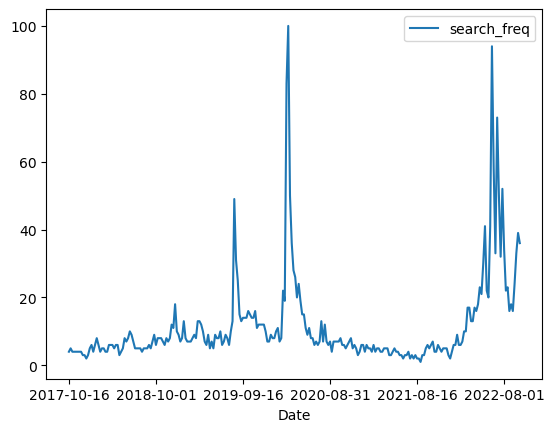

In [8]:
# Plot the search data
main_df.plot(x='Date', y='search_freq')

<AxesSubplot:xlabel='Date'>

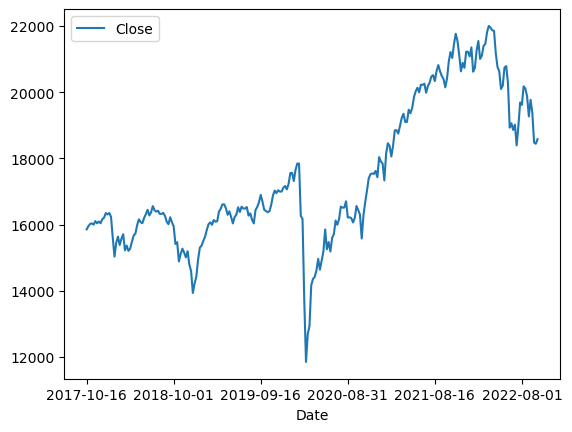

In [9]:
# Plot the stock data
main_df.plot(x='Date', y='Close')

<AxesSubplot:xlabel='Date'>

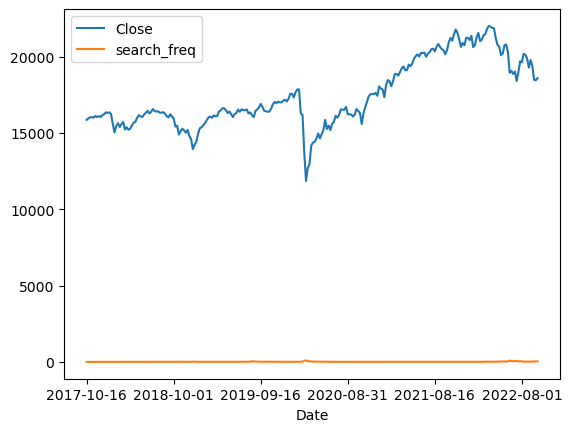

In [10]:
# Plot them together without normalizing
main_df.plot(x='Date', y=['Close', 'search_freq'])

In [11]:
# So obviously we need to normalize
# Running the code below will apply min-max normalization to the 
def norm_min_max(df, cols):
    for col in cols:
        df[col] = df[col]/df[col].abs().max()
    
norm_min_max(main_df, ['Close', 'search_freq'])

<AxesSubplot:xlabel='Date'>

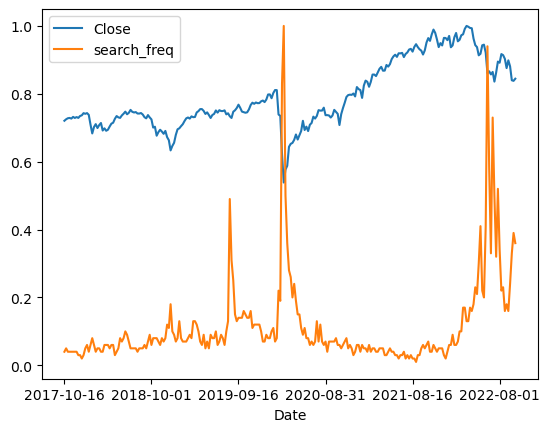

In [12]:
# Plotting the normalized data
main_df.plot(x='Date', y=['Close', 'search_freq'])

Your graph will probably look a little odd, with the bar for your close situated primarily in the top half of the graph, and the search data primarily in the lower half. We try to address these and other data issues as the project goes on